In [1]:
from gensim import corpora, models, similarities, matutils
import time
import logging, gensim
import scipy.stats as stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 8, 5  # plotsize
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['font.size'] = 14

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


## Load the dictionary and corpus

In [22]:
# load id->word mapping (the dictionary)
dictionary = gensim.corpora.Dictionary.load('indeed.dict')

In [5]:
# load corpus iterator
mm = gensim.corpora.MmCorpus('IndeedCorpus.mm')

### Initial run of LDA

In [8]:
# extract LDA topics
t = time.time()
n=200
ldamodel = gensim.models.ldamodel.LdaModel(corpus=mm, num_topics=n, id2word = dictionary, chunksize=10000, passes=20)

elapsed = (time.time() - t)/60    
print("LDA done in %.2f minutes"%elapsed)

LDA done in 77.71 minutes


In [12]:
ldamodel.save('ldamodelv1.lda')

In [2]:
ldam1=gensim.models.ldamodel.LdaModel.load('ldamodelv1.lda')

In [6]:
lda_topics = ldam1[mm]
toptopics = ldam1.top_topics(mm, num_words=20)

In [20]:
for t in toptopics:
    print list(t)[0]
    break

[(0.043043685133198423, u'manag'), (0.035774259562186196, u'project'), (0.024068954475680682, u'busi'), (0.020167238539320682, u'team'), (0.017905049661607012, u'develop'), (0.014487981077466069, u'process'), (0.012014658332866995, u'implement'), (0.011159389829066151, u'solut'), (0.010569508579687662, u'work'), (0.010007681392054628, u'requir'), (0.0085805916385798178, u'plan'), (0.008444070475921682, u'system'), (0.0081041850343026942, u'lead'), (0.0073762629309699502, u'product'), (0.0073372180356804035, u'provid'), (0.0072727097676867991, u'design'), (0.0069787690844879601, u'report'), (0.0069484688250969874, u'function'), (0.0068764540590742079, u'respons'), (0.0066563254435135109, u'support')]


In [ ]:
## Visualization of top topics and doc-topic distributions

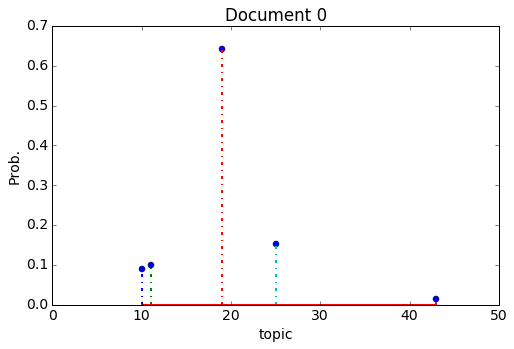

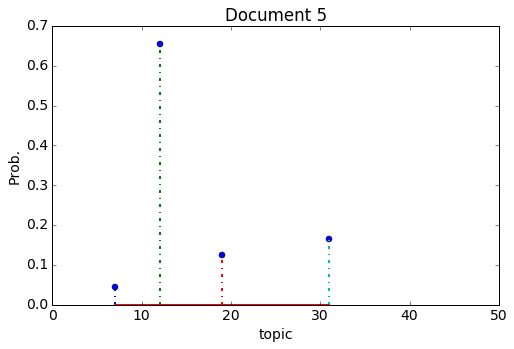

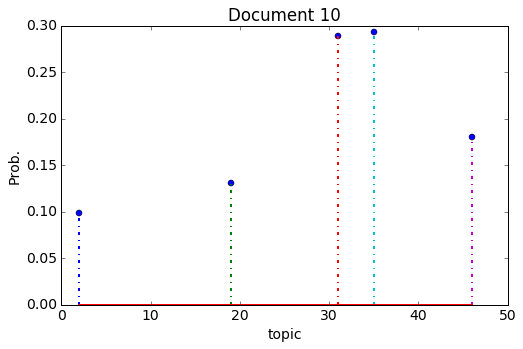

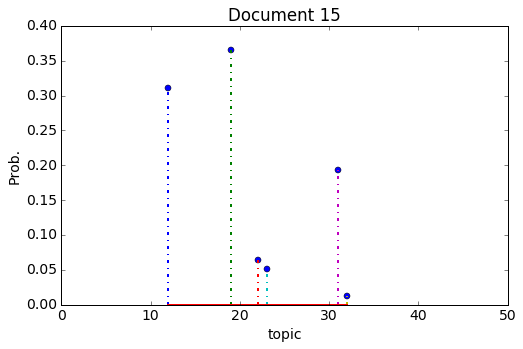

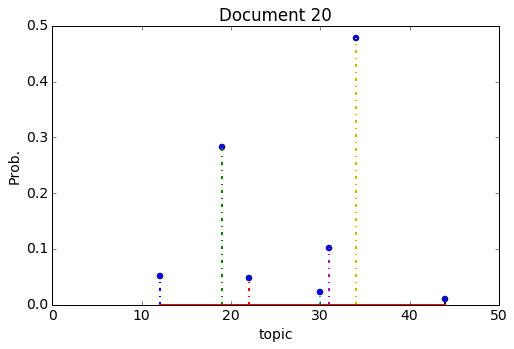

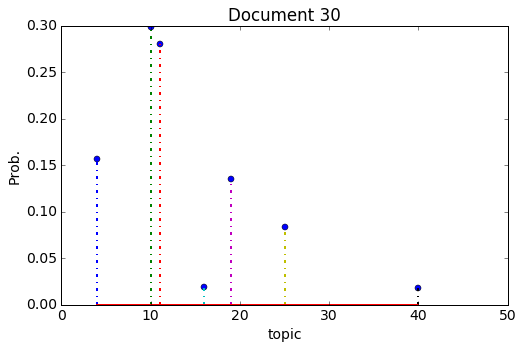

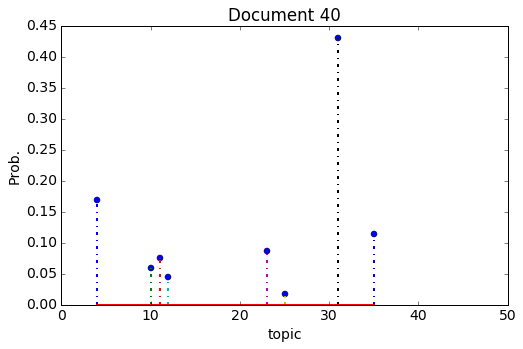

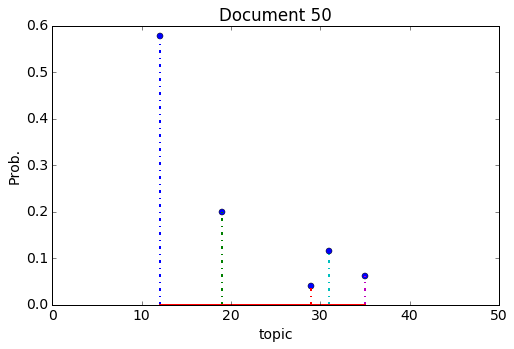

In [14]:
### doc-topic distribution
docs=[0,5,10,15,20,30,40,50]
for i,k in enumerate(docs):
    plt.figure(i)
    tlist=[]
    plist=[]
    for t, p in lda_topics[k]:
        tlist.append(t)
        plist.append(p)
    markerline, stemlines, baseline = plt.stem(np.array(tlist),np.array(plist), '-.')
    plt.setp(markerline, 'markerfacecolor', 'b')
    plt.setp(baseline, 'color', 'r', 'linewidth', 2)
    plt.title('Document %d'%k)
    plt.xlabel('topic')
    plt.ylabel('Prob.')
    plt.xlim(0,50)
    
    plt.show()

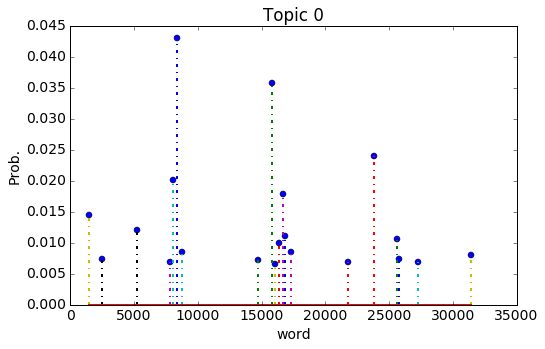

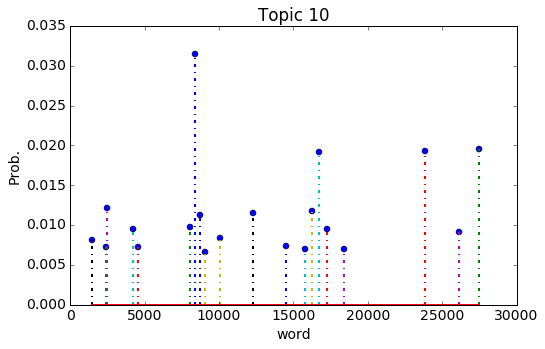

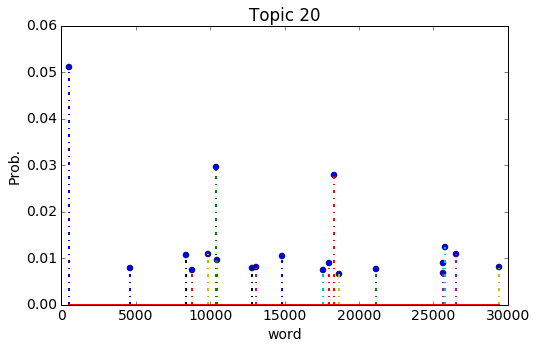

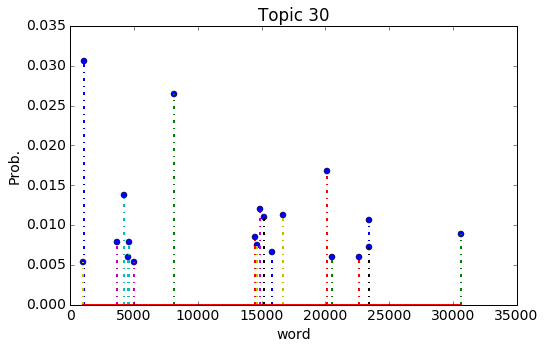

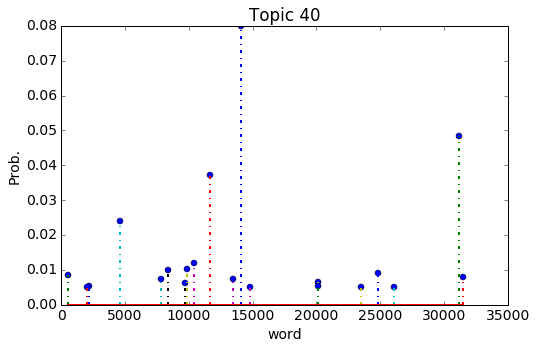

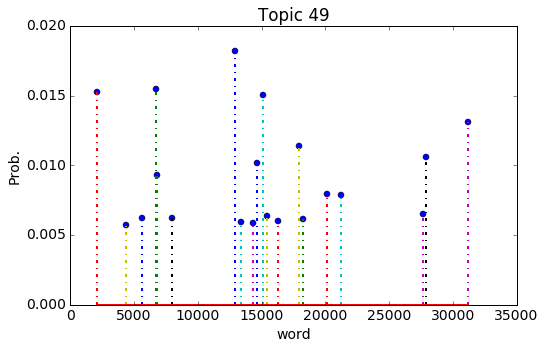

In [24]:
### doc-word distribution
topics=[0,10,20,30,40,49]
for i,k in enumerate(topics):
    plt.figure(i)
    tlist=[]
    plist=[]
    for p, word in list(toptopics[k])[0]:
        plist.append(p)
        tlist.append(dictionary.token2id[word])
    markerline, stemlines, baseline = plt.stem(np.array(tlist),np.array(plist), '-.')
    plt.setp(markerline, 'markerfacecolor', 'b')
    plt.setp(baseline, 'color', 'r', 'linewidth', 2)
    plt.title('Topic %d'%k)
    plt.xlabel('word')
    plt.ylabel('Prob.')
#    plt.xlim(0,50)
    
    plt.show()

In [4]:
ldam1.show_topics(num_topics=10, num_words=20)

[(44,
  u'0.029*custom + 0.016*sale + 0.015*servic + 0.014*assist + 0.012*work + 0.011*store + 0.011*maintain + 0.009*order + 0.008*product + 0.008*inventori + 0.007*respons + 0.006*skill + 0.006*prepar + 0.006*experi + 0.006*provid + 0.006*need + 0.006*answer + 0.005*daili + 0.005*use + 0.005*may'),
 (47,
  u'0.021*research + 0.016*develop + 0.014*comput + 0.013*univers + 0.013*data + 0.010*work + 0.007*use + 0.007*scienc + 0.007*softwar + 0.006*algorithm + 0.006*design + 0.006*engin + 0.006*august + 0.006*experi + 0.006*present + 0.005*assist + 0.005*scientist + 0.005*januari + 0.005*model + 0.005*project'),
 (0,
  u'0.028*develop + 0.015*applic + 0.013*android + 0.013*design + 0.010*use + 0.009*http + 0.008*mobil + 0.007*work + 0.007*com + 0.007*creat + 0.006*project + 0.006*experi + 0.005*technolog + 0.005*tool + 0.005*requir + 0.005*system + 0.005*integr + 0.005*data + 0.005*implement + 0.005*app'),
 (31,
  u'0.043*manag + 0.036*project + 0.024*busi + 0.020*team + 0.018*develop + 

In [9]:
print ("Top %d topics are:\n"%n)
print(ldamodel.print_topics(num_topics=10, num_words=20))

Top 50 topics are:

[(13, u'0.035*mi + 0.023*system + 0.018*softwar + 0.017*test + 0.010*univers + 0.009*use + 0.009*engin + 0.008*detroit + 0.008*code + 0.008*michigan + 0.008*adjunct + 0.008*arbor + 0.007*ann + 0.007*radio + 0.006*design + 0.005*faculti + 0.005*time + 0.005*state + 0.005*network + 0.005*work'), (9, u'0.034*nurs + 0.021*patient + 0.021*care + 0.016*medic + 0.015*hospit + 0.015*clinic + 0.014*practition + 0.011*center + 0.011*health + 0.009*manag + 0.008*univers + 0.008*assist + 0.008*present + 0.008*respons + 0.007*student + 0.006*emerg + 0.006*provid + 0.006*famili + 0.006*work + 0.006*physician'), (22, u'0.034*report + 0.026*manag + 0.013*provid + 0.012*perform + 0.011*develop + 0.011*financi + 0.011*review + 0.010*support + 0.009*process + 0.009*depart + 0.009*includ + 0.008*plan + 0.008*work + 0.008*monthli + 0.008*oper + 0.007*analysi + 0.007*analyt + 0.007*respons + 0.007*complianc + 0.007*analyst'), (18, u'0.027*develop + 0.027*work + 0.023*io + 0.018*app + 0.0

## KL divergence to find the optimal number of topics

In [10]:
# Define KL function
def sym_kl(p,q):
    return np.sum([stats.entropy(p,q),stats.entropy(q,p)])

In [ ]:
cm2norm

In [ ]:
l = np.array([sum(cnt for _, cnt in doc) for doc in mm])
cm2norm = np.linalg.norm(l)

def arun(corpus,dictionary,min_topics=1,max_topics=10,step=10):
    kl = []
    for i in range(min_topics,max_topics,step):
        print "starting with %d topics"%i
        lda = models.ldamodel.LdaModel(corpus=corpus,
            id2word=dictionary,num_topics=i)
#        m1 = lda.expElogbeta
#        print len(m1)
        m1 = gensim.matutils.corpus2csc(lda.expElogbeta)

        _,cm1,_ = sparsesvd(m1,k=i)
#        _,cm1,_ = np.linalg.svd(lda.expElogbeta)
#        print len(cm1)
#        del m1
        
        #Document-topic matrix
        lda_topics = lda[corpus]
        m2 = matutils.corpus2dense(lda_topics, lda.num_topics).transpose()
#       print m2.shape()
        cm2 = l.dot(m2)
        del lda_topics,m2
        
        cm2 = cm2 + 0.0001
        cm2 = cm2/cm2norm
        kl.append(sym_kl(cm1,cm2))
        
        del cm1,cm2
    return kl

In [ ]:
#kl = arun(mm,dictionary,max_topics=100)

In [ ]:
# Plot kl divergence against number of topics
plt.plot(kl)
plt.ylabel('Symmetric KL Divergence')
plt.xlabel('Number of Topics')
plt.savefig('kldiv.png', bbox_inches='tight')